# Vertical transmission: sensitivity analysis

In [1]:
from SALib.sample import saltelli, fast_sampler
import pandas as pd
from Sensitivity import Sensitivity

model_path = "../models/BMI-SNP/"
output_path = "../output/data/"
plots_path = "../output/plots/"

In [3]:
# parameter dictionary
problem = {
    'num_vars': 3,
    'names': ['random-mating', 'leakage', 'fertility-differential'],
    'bounds': [[0, 1.0],
               [0, 0.50],
               [0, 0.30]]
}

# EFast

In [4]:
sample_parameters = True
if (sample_parameters):
    param_values = fast_sampler.sample(problem, 2000)
    t = pd.DataFrame(param_values)
    t.columns = ['random-mating', 'leakage', 'fertility-differential']
    t.to_csv(model_path + "data/param-vt-efast.csv", index=False)
else:
    t = pd.read_csv(model_path + "data/param-vt-efast.csv")
t.shape

(6000, 3)

In [4]:
# process results
df = pd.read_csv(output_path + "results-snp-vt-efast.csv", sep = ";")
cols = df.bmi_category_prop.str.replace(r'\[|\]', '').str.split(",", n=4, expand=True)
colnames = ['g'+str(i+1) for i in range(4)]
cols.columns = colnames
cols = cols[colnames].apply(pd.to_numeric)
df = pd.concat([df, cols], axis=1, ignore_index=False)
params = pd.read_csv(output_path + "param-snp-vt-efast.csv", sep = ";")
df = df.merge(params, on = ["iteration", "replicate"])
df = df.sort_values(by=['iteration'])
df = df.loc[df["iteration"] <= len(t),:]

# select parameters
vars = ['p_fertility_factor', 'p_random_mating', 'p_genetic_variance']
X = df.loc[:,vars]

<ipython-input-4-2a0cac65e141>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  cols = df.bmi_category_prop.str.replace(r'\[|\]', '').str.split(",", n=4, expand=True)


## Obesity

                               S1        ST   S1_conf   ST_conf
random-mating            0.192484  0.406608  0.004307  0.017857
genetic-variance         0.384405  0.613412  0.003736  0.017882
vertical-trans-variance  0.152249  0.304612  0.003138  0.018669


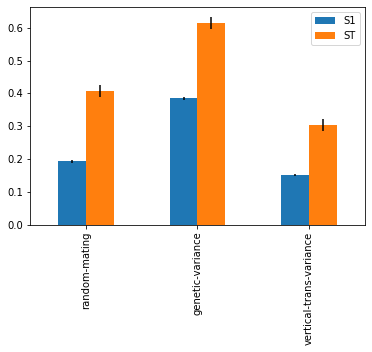

In [8]:
ef = Sensitivity(problem, df['g4'], X)
ef.score('efast')
ef.plot(save=True, filepath= plots_path + 'vt-efast-prop-obese.pdf',
    move=True, moving_path= '../manuscript/plots/')
ef.plot3D(labels={'outcome':'obese', 'y':'random mating', 'x':'vertical transmission', 'z':'genes'})

## BMI

                               S1        ST   S1_conf   ST_conf
random-mating            0.098319  0.669410  0.003370  0.022412
genetic-variance         0.200514  0.762468  0.004329  0.020688
vertical-trans-variance  0.065278  0.572506  0.003844  0.017022


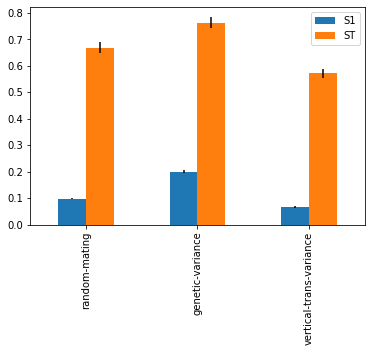

In [22]:
ef = Sensitivity(problem, df['average_bmi'], X)
ef.score('efast')
ef.plot(save=True, filepath= plots_path + 'vt-efast-average-bmi.pdf',
    move=True, moving_path= '../manuscript/plots/')
ef.plot3D(labels={'outcome':'average bmi', 'y':'random mating', 'x':'vertical transmission', 'z':'genes'})

## SD BMI

                               S1        ST   S1_conf   ST_conf
random-mating            0.247175  0.459991  0.004347  0.018549
genetic-variance         0.357261  0.565991  0.003831  0.020799
vertical-trans-variance  0.139957  0.244216  0.004789  0.018746


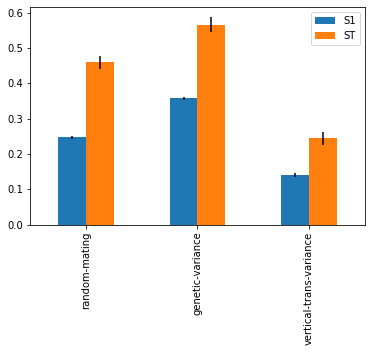

In [18]:
ef = Sensitivity(problem, df['sd_bmi'], X)
ef.score('efast')
ef.plot(save=True, filepath= plots_path + 'vt-efast-sd-bmi.pdf',
    move=True, moving_path= '../manuscript/plots/')
ef.plot3D(labels={'outcome':'sd bmi', 'y':'random mating', 'x':'vertical transmission', 'z':'genes'})

# Sobol

In [16]:
sample_parameters = True
if (sample_parameters):
    param_values = saltelli.sample(problem, 2**11)
    t = pd.DataFrame(param_values)
    t.columns = ['random-mating', 'genetic-variance', 'vertical-trans-variance']
    t.to_csv(model_path + "data/param-snp-vt-sobol.csv", index=False)
else:
    t = pd.read_csv(model_path + "data/param-snp-vt-sobol.csv")
len(t)

16384

In [ ]:
# process results
df = pd.read_csv(output_path, "results-snp-sobol.csv", sep = ";")
cols = df.bmi_group_prop.str.replace(r'\[|\]', '').str.split(",", n=4, expand=True)
colnames = ['g'+str(i+1) for i in range(4)]
cols.columns = colnames
cols = cols[colnames].apply(pd.to_numeric)
df = pd.concat([df, cols], axis=1, ignore_index=False)
params = pd.read_csv(output_path + "param-snp-sobol.csv", sep = ";")
df = df.merge(params, on = ["iteration", "replicate"])
df["iteration"] = pd.to_numeric(df["iteration"])
df = df.sort_values(by=['iteration'])
df = df.loc[df["iteration"] <= len(t),:]
Y = df["g4"].to_numpy()
len(Y)